In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [36]:
df1 = pd.read_excel (r'D:\MBATech\badm\031020 mt2\badm_mt2.xlsx', sheet_name='mlr')
df = df1.drop('Unnamed: 0',axis=1)
#df.head(5)

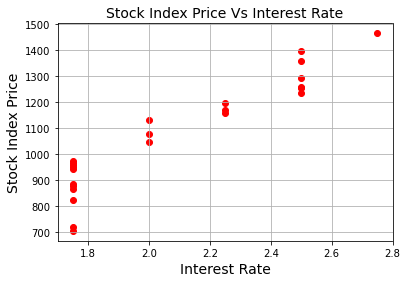

In [37]:
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

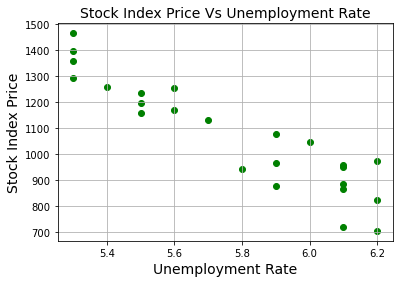

In [38]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression.
Y = df['Stock_Index_Price']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           4.04e-11
Time:                        19:45:08   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]

the r-squared is:  0.8976335894170215
the coefficient (value of a) for unemployment, Intrest rate, constant is:  [1798.40397763  345.54008701 -250.14657137]


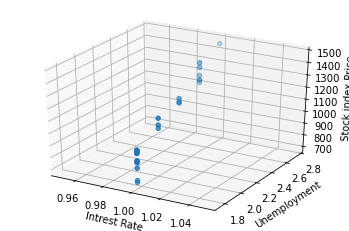

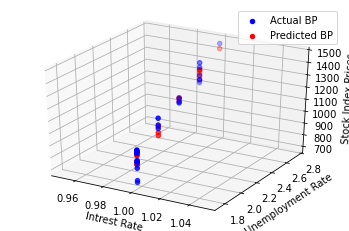

In [41]:
#X = df[['Interest_Rate','Unemployment_Rate']]
# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Intrest Rate')
ax.set_ylabel('Unemployment')
ax.set_zlabel('Stock index Price')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for unemployment, Intrest rate, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='b', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='r', label='Predicted BP')
#ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Intrest Rate')
ax.set_ylabel('Unemployment Rate')
ax.set_zlabel('Stock Index Prices')
ax.legend()
plt.show()

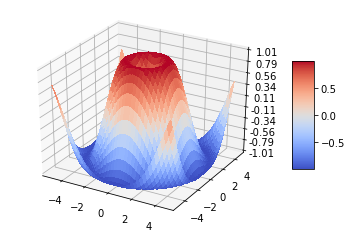

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()